In [ ]:
import pandas as pd
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
sample_df=df.iloc[0:2000]
sample_df['heart_disease'] = sample_df['heart_disease'].apply(lambda x: 'Yes' if x ==1 else "No")
sample_df['stroke'] = sample_df['stroke'].apply(lambda x: 'Yes' if x ==1 else "No")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


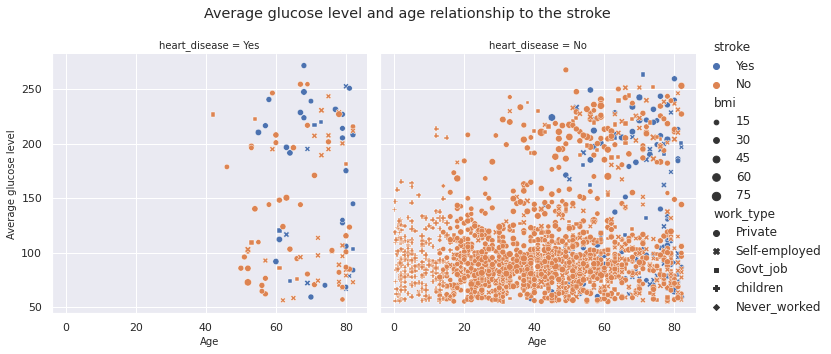

In [ ]:
sns.set_theme(font_scale=1,rc= {'figure.figsize':(40,40),'axes.labelsize':10})
g = sns.relplot(data=sample_df,
    x='age',y='avg_glucose_level',col='heart_disease',
    hue='stroke',size='bmi',style='work_type')
g.fig.suptitle('Average glucose level and age relationship to the stroke')
g.fig.subplots_adjust(top = 0.85)
g.set_axis_labels('Age','Average glucose level')
plt.show()

In [ ]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


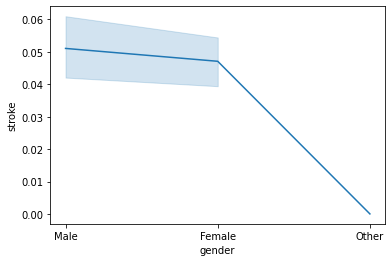

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


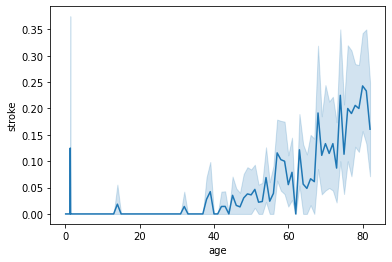

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


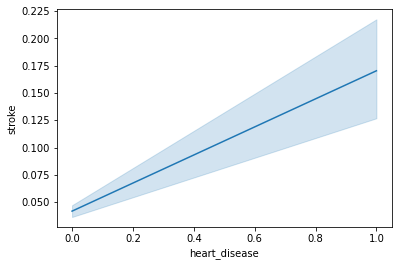

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


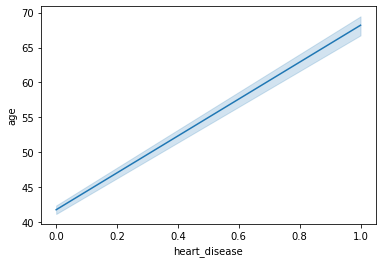

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


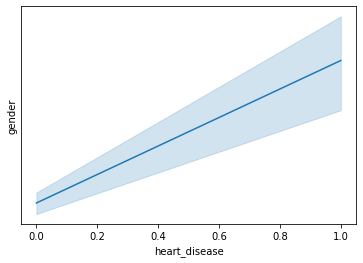

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


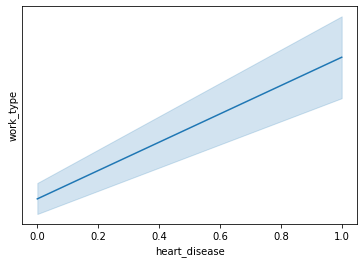

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


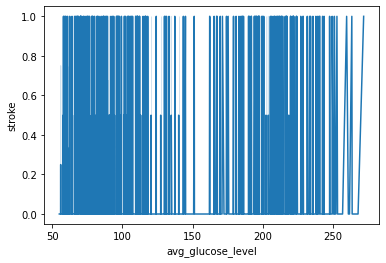

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


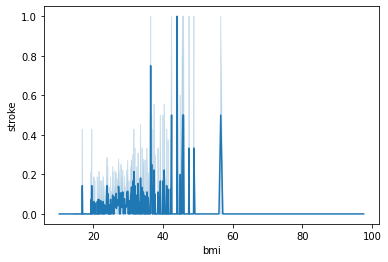

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


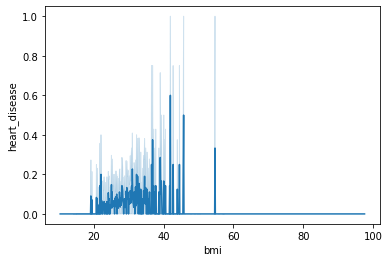

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


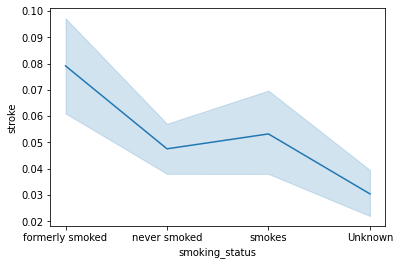

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


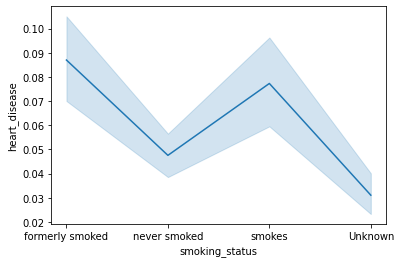

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


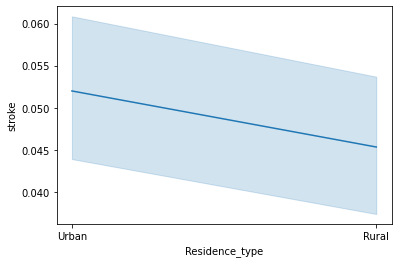

In [ ]:
# EDA
# correlation
# gender vs stroke
sns.lineplot(df.gender,df.stroke)
plt.show()

# age vs stroke
sns.lineplot(df.age,df.stroke)
plt.show()


# heart disease vs stroke
sns.lineplot(df.heart_disease,df.stroke)
plt.show()


# heart disease vs age
sns.lineplot(df.heart_disease,df.age)
plt.show()

# heart disease vs gender
sns.lineplot(df.heart_disease,df.gender)
plt.show()


# heart disease vs work type
sns.lineplot(df.heart_disease,df.work_type)
plt.show()


# avg_glucose_level vs stroke
sns.lineplot(df.avg_glucose_level,df.stroke)
plt.show()


# bmi vs stroke
sns.lineplot(df.bmi,df.stroke)
plt.show()


# bmi vs heart disease
sns.lineplot(df.bmi,df.heart_disease)
plt.show()

# smoking_status vs stroke
sns.lineplot(df.smoking_status,df.stroke)
plt.show()

# smoking status vs heart disease
sns.lineplot(df.smoking_status,df.heart_disease)
plt.show()


# residence type vs stroke
sns.lineplot(df.Residence_type,df.stroke)
plt.show()


In [ ]:
#One hot encoding
#Get dummies
df=pd.get_dummies(df,drop_first=True)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
df=df.fillna(df.median())
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
X = df.drop(["id","stroke"],axis=1).values
y = df[['stroke']].values

In [ ]:
df.isna().sum()
#check nan values

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit(X)
X_scaled = X_scaled.transform(X)

In [ ]:
df.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_res.shape

(9722, 16)

In [ ]:
y_res.shape

(9722,)

In [ ]:
sum(y_res)

4861

In [ ]:
X=X_res
y=y_res

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit(X)
X_scaled = X_scaled.transform(X)

In [ ]:
# Split our training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xtrain_, Xtest, ytrain_, ytest = train_test_split(X_scaled, y, random_state=0, test_size=0.2)

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain_, ytrain_, random_state=0, test_size=0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
def plot_roc_auc(fpr, tpr):
  sns.lineplot(fpr,tpr)
  return auc(fpr,tpr)

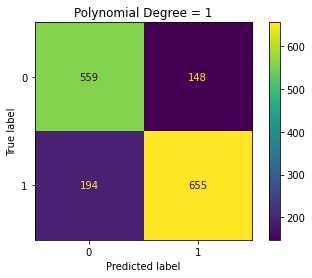

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.7802056555269923
AUC = 0.7636684478358877


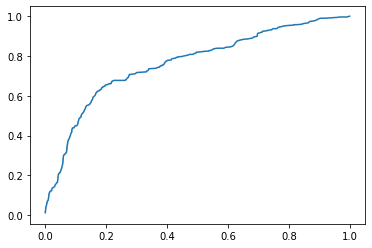

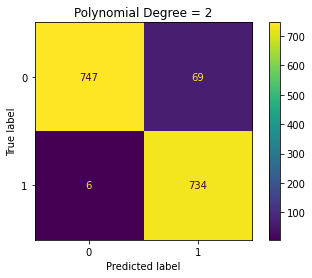

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.9517994858611826
AUC = 0.9070740698476333


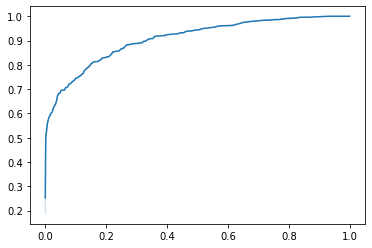

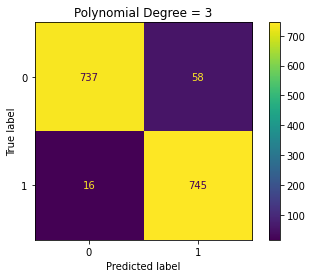

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.9524421593830334
AUC = 0.8751974253256795


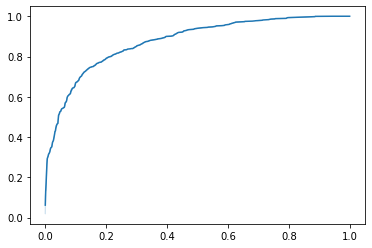

In [ ]:
def LR(Xtrain, ytrain, Xtest, ytest, poly_feature_obj=False, prob_thres=0.5):
  lr = LogisticRegression(solver = 'newton-cg')
  if poly_feature_obj != False:
    Xtrain = poly_feature_obj.fit_transform(Xtrain)
    Xtrain = sc.fit_transform(Xtrain)
    Xtest = poly_feature_obj.fit_transform(Xtest)
    Xtest = sc.fit_transform(Xtest)

  lr.fit(Xtrain, ytrain.reshape(-1))
  ypred = lr.predict(Xtest)
  score = lr.score(Xtest,ytest)
  ytest_prob = lr.predict_proba(Xtest > prob_thres)
  fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
  return [lr, ypred, score, ytest_prob, fpr, tpr, 0]

ret_values_lr = []
ret_values_lr.append(LR(Xtrain, ytrain, Xval, yval))
ret_values_lr.append(LR(Xtrain, ytrain, Xval, yval, poly_2))
ret_values_lr.append(LR(Xtrain, ytrain, Xval, yval, poly_3))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(ret_values_lr[0][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 1")
plt.show()
ret_values_lr[0][-1] = plot_roc_auc(ret_values_lr[0][4], ret_values_lr[0][5])
print("Accuracy =", ret_values_lr[0][2])
print("AUC =", ret_values_lr[0][-1])

conf = confusion_matrix(ret_values_lr[1][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 2")
plt.show()
ret_values_lr[1][-1] = plot_roc_auc(ret_values_lr[1][4], ret_values_lr[1][5])
print("Accuracy =", ret_values_lr[1][2])
print("AUC =", ret_values_lr[1][-1])

conf = confusion_matrix(ret_values_lr[2][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 3")
plt.show()
ret_values_lr[2][-1] = plot_roc_auc(ret_values_lr[2][4], ret_values_lr[2][5])
print("Accuracy =", ret_values_lr[2][2])
print("AUC =", ret_values_lr[2][-1])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Paral

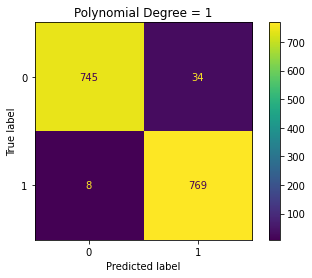

Accuracy = 0.9730077120822622
AUC = 0.7832894242870776


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


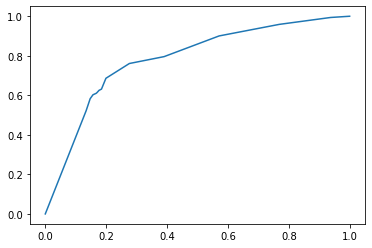

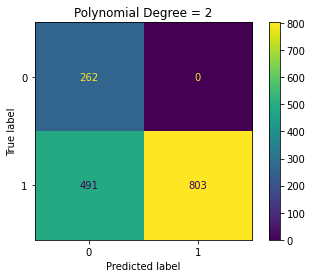

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.6844473007712082
AUC = 0.8645302558962986


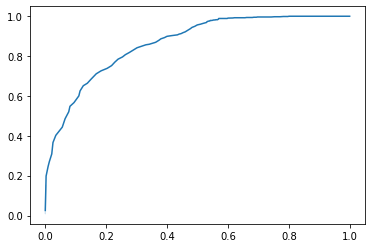

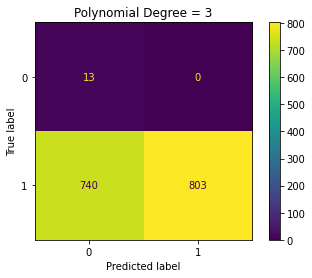

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.5244215938303342
AUC = 0.7423688392961983


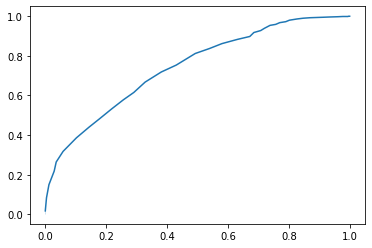

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def RF(Xtrain, ytrain, Xtest, ytest, poly_feature_obj=False, prob_thres=0.5):
  rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, max_features='auto', bootstrap=True, n_jobs=4, random_state=0, verbose=1)
  if poly_feature_obj != False:
    Xtrain = poly_feature_obj.fit_transform(Xtrain)
    Xtrain = sc.fit_transform(Xtrain)
    Xtest = poly_feature_obj.fit_transform(Xtest)
    Xtest = sc.fit_transform(Xtest)
  rf.fit(Xtrain, ytrain.reshape(-1))
  ypred = rf.predict(Xtest)
  score = rf.score(Xtest,ytest)
  ytest_prob = rf.predict_proba(Xtest > prob_thres)
  fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
  return [rf, ypred, score, ytest_prob, fpr, tpr, 0]

ret_values_rf = []
ret_values_rf.append(RF(Xtrain, ytrain, Xval, yval))
ret_values_rf.append(RF(Xtrain, ytrain, Xval, yval, poly_2))
ret_values_rf.append(RF(Xtrain, ytrain, Xval, yval, poly_3))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(ret_values_rf[0][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 1")
plt.show()
ret_values_rf[0][-1] = plot_roc_auc(ret_values_rf[0][4], ret_values_rf[0][5])
print("Accuracy =", ret_values_rf[0][2])
print("AUC =", ret_values_rf[0][-1])

conf = confusion_matrix(ret_values_rf[1][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 2")
plt.show()
ret_values_rf[1][-1] = plot_roc_auc(ret_values_rf[1][4], ret_values_rf[1][5])
print("Accuracy =", ret_values_rf[1][2])
print("AUC =", ret_values_rf[1][-1])

conf = confusion_matrix(ret_values_rf[2][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 3")
plt.show()
ret_values_rf[2][-1] = plot_roc_auc(ret_values_rf[2][4], ret_values_rf[2][5])
print("Accuracy =", ret_values_rf[2][2])
print("AUC =", ret_values_rf[2][-1])

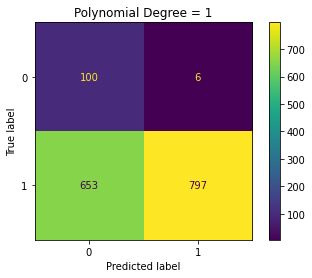

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.5764781491002571
AUC = 0.5


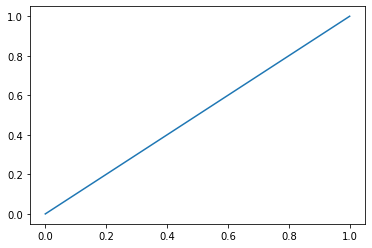

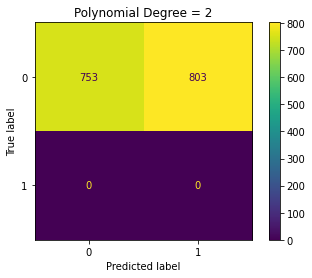

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.4839331619537275
AUC = 0.5


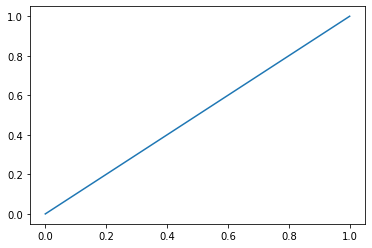

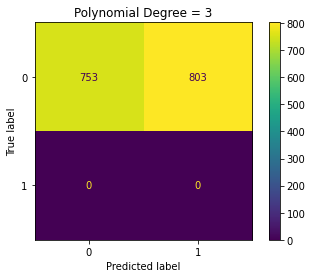

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.4839331619537275
AUC = 0.5


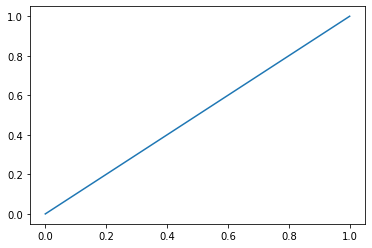

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

def NB(Xtrain, ytrain, Xtest, ytest, poly_feature_obj=False, prob_thres=0.5):
  gnb = GaussianNB()
  if poly_feature_obj != False:
    Xtrain = poly_feature_obj.fit_transform(Xtrain)
    Xtrain = sc.fit_transform(Xtrain)
    Xtest = poly_feature_obj.fit_transform(Xtest)
    Xtest = sc.fit_transform(Xtest)
  ypred = gnb.fit(Xtrain, ytrain.reshape(-1))
  ypred = gnb.predict(Xtest)
  score = gnb.score(Xtest,ytest)
  ytest_prob = gnb.predict_proba(Xtest > prob_thres)
  fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
  return [gnb, ypred, score, ytest_prob, fpr, tpr, 0]

ret_values_nb = []
ret_values_nb.append(NB(Xtrain, ytrain, Xval, yval))
ret_values_nb.append(NB(Xtrain, ytrain, Xval, yval, poly_2))
ret_values_nb.append(NB(Xtrain, ytrain, Xval, yval, poly_3))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(ret_values_nb[0][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 1")
plt.show()
ret_values_nb[0][-1] = plot_roc_auc(ret_values_nb[0][4], ret_values_nb[0][5])
print("Accuracy =", ret_values_nb[0][2])
print("AUC =", ret_values_nb[0][-1])

conf = confusion_matrix(ret_values_nb[1][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 2")
plt.show()
ret_values_nb[1][-1] = plot_roc_auc(ret_values_nb[1][4], ret_values_nb[1][5])
print("Accuracy =", ret_values_nb[1][2])
print("AUC =", ret_values_nb[1][-1])

conf = confusion_matrix(ret_values_nb[2][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 3")
plt.show()
ret_values_nb[2][-1] = plot_roc_auc(ret_values_nb[2][4], ret_values_nb[2][5])
print("Accuracy =", ret_values_nb[2][2])
print("AUC =", ret_values_nb[2][-1])

Iteration 1, loss = 0.45887338
Iteration 2, loss = 0.34697024
Iteration 3, loss = 0.27910030
Iteration 4, loss = 0.21481919
Iteration 5, loss = 0.17428478
Iteration 6, loss = 0.15087120
Iteration 7, loss = 0.15138665
Iteration 8, loss = 0.13482758
Iteration 9, loss = 0.11446820
Iteration 10, loss = 0.10561439
Iteration 11, loss = 0.11017341
Iteration 12, loss = 0.10457766
Iteration 13, loss = 0.09849591
Iteration 14, loss = 0.10170527
Iteration 15, loss = 0.11382181
Iteration 16, loss = 0.09249293
Iteration 17, loss = 0.07436087
Iteration 18, loss = 0.06986653
Iteration 19, loss = 0.07535716
Iteration 20, loss = 0.07579796
Iteration 21, loss = 0.07241304
Iteration 22, loss = 0.07378496
Iteration 23, loss = 0.08030236
Iteration 24, loss = 0.05998604
Iteration 25, loss = 0.05653166
Iteration 26, loss = 0.05489449
Iteration 27, loss = 0.06115306
Iteration 28, loss = 0.06884019
Iteration 29, loss = 0.07016474
Iteration 30, loss = 0.08726320
Iteration 31, loss = 0.09019627
Iteration 32, los

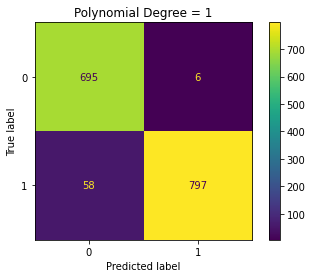

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.9588688946015425
AUC = 0.7055629702030402


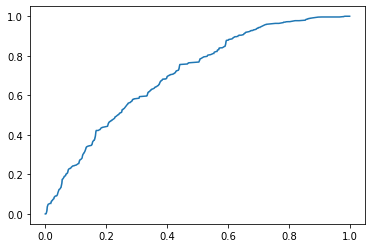

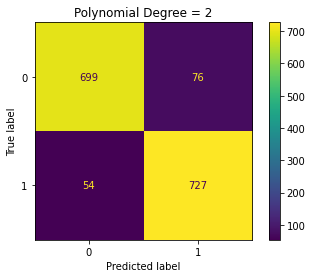

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.916452442159383
AUC = 0.8866890263768505


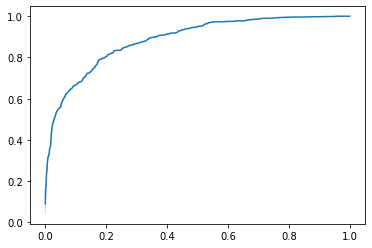

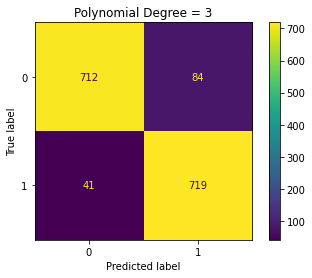

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.9196658097686375
AUC = 0.8699829159906658


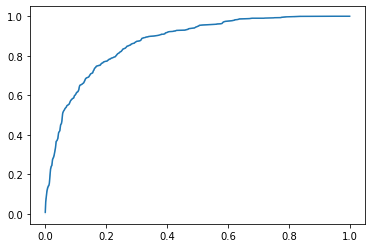

In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier

def NN(Xtrain, ytrain, Xtest, ytest, poly_feature_obj=False, prob_thres=0.5):
  NN = MLPClassifier((4000, 1000, 200), shuffle=False, random_state=0, verbose=1)
  if poly_feature_obj != False:
    Xtrain = poly_feature_obj.fit_transform(Xtrain)
    Xtrain = sc.fit_transform(Xtrain)
    Xtest = poly_feature_obj.fit_transform(Xtest)
    Xtest = sc.fit_transform(Xtest)
  ypred = NN.fit(Xtrain, ytrain.reshape(-1))
  ypred = NN.predict(Xtest)
  score = NN.score(Xtest,ytest)
  ytest_prob = NN.predict_proba(Xtest > prob_thres)
  fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
  return [NN, ypred, score, ytest_prob, fpr, tpr, 0]

ret_values_nn = []
ret_values_nn.append(NN(Xtrain, ytrain, Xval, yval))
ret_values_nn.append(NN(Xtrain, ytrain, Xval, yval, poly_2))
ret_values_nn.append(NN(Xtrain, ytrain, Xval, yval, poly_3))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(ret_values_nn[0][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 1")
plt.show()
ret_values_nn[0][-1] = plot_roc_auc(ret_values_nn[0][4], ret_values_nn[0][5])
print("Accuracy =", ret_values_nn[0][2])
print("AUC =", ret_values_nn[0][-1])

conf = confusion_matrix(ret_values_nn[1][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 2")
plt.show()
ret_values_nn[1][-1] = plot_roc_auc(ret_values_nn[1][4], ret_values_nn[1][5])
print("Accuracy =", ret_values_nn[1][2])
print("AUC =", ret_values_nn[1][-1])

conf = confusion_matrix(ret_values_nn[2][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 3")
plt.show()
ret_values_nn[2][-1] = plot_roc_auc(ret_values_nn[2][4], ret_values_nn[2][5])
print("Accuracy =", ret_values_nn[2][2])
print("AUC =", ret_values_nn[2][-1])

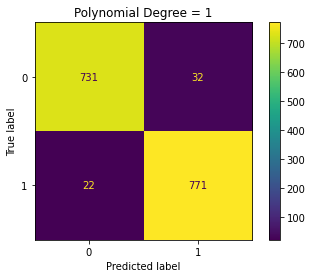

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.9652956298200515
AUC = 0.6854425386870946


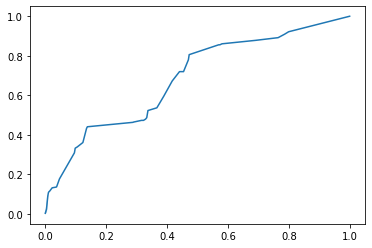

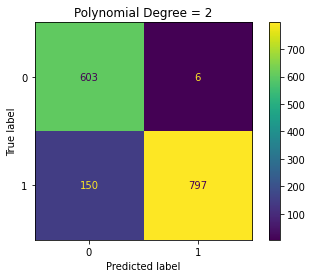

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.8997429305912596
AUC = 0.7727702721699338


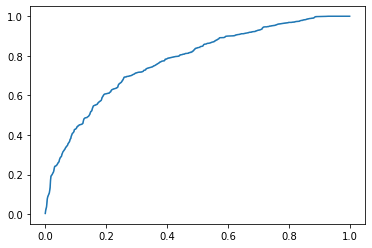

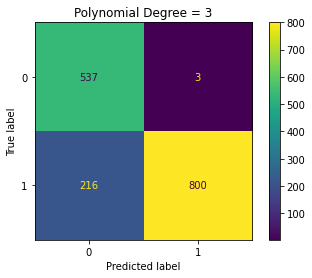

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy = 0.859254498714653
AUC = 0.7372295789858416


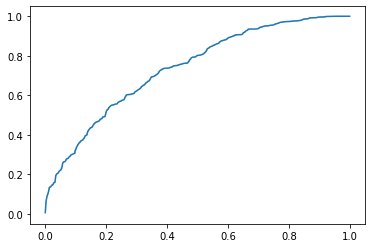

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def AB(Xtrain, ytrain, Xtest, ytest, poly_feature_obj=False, prob_thres=0.5):
  abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),random_state=0,n_estimators=500, learning_rate=0.1)
  if poly_feature_obj != False:
    Xtrain = poly_feature_obj.fit_transform(Xtrain)
    Xtrain = sc.fit_transform(Xtrain)
    Xtest = poly_feature_obj.fit_transform(Xtest)
    Xtest = sc.fit_transform(Xtest)
  ypred = abc.fit(Xtrain, ytrain.reshape(-1))
  ypred = abc.predict(Xtest)
  score = abc.score(Xtest,ytest)
  ytest_prob = abc.predict_proba(Xtest > prob_thres)
  fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
  return [abc, ypred, score, ytest_prob, fpr, tpr, 0]

ret_values_ab = []
ret_values_ab.append(AB(Xtrain, ytrain, Xval, yval))
ret_values_ab.append(AB(Xtrain, ytrain, Xval, yval, poly_2))
ret_values_ab.append(AB(Xtrain, ytrain, Xval, yval, poly_3))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(ret_values_ab[0][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 1")
plt.show()
ret_values_ab[0][-1] = plot_roc_auc(ret_values_ab[0][4], ret_values_ab[0][5])
print("Accuracy =", ret_values_ab[0][2])
print("AUC =", ret_values_ab[0][-1])

conf = confusion_matrix(ret_values_ab[1][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 2")
plt.show()
ret_values_ab[1][-1] = plot_roc_auc(ret_values_ab[1][4], ret_values_ab[1][5])
print("Accuracy =", ret_values_ab[1][2])
print("AUC =", ret_values_ab[1][-1])

conf = confusion_matrix(ret_values_ab[2][1], yval)
ConfusionMatrixDisplay(conf).plot()
plt.title("Polynomial Degree = 3")
plt.show()
ret_values_ab[2][-1] = plot_roc_auc(ret_values_ab[2][4], ret_values_ab[2][5])
print("Accuracy =", ret_values_ab[2][2])
print("AUC =", ret_values_ab[2][-1])

In [ ]:
print("Model   Features-Degree   Accuracy   AUC")
print("LR             1", round(ret_values_lr[0][2], 5),"  ", ret_values_lr[0][-1])
print("LR             2", round(ret_values_lr[1][2], 5),"  ", ret_values_lr[1][-1])
print("LR             3", round(ret_values_lr[2][2], 5),"  ", ret_values_lr[2][-1])
print("RF             1", round(ret_values_rf[0][2], 5),"  ", ret_values_rf[0][-1])
print("RF             2", round(ret_values_rf[1][2], 5),"  ", ret_values_rf[1][-1])
print("RF             3", round(ret_values_rf[2][2], 5),"  ", ret_values_rf[2][-1])
print("NB             1", round(ret_values_nb[0][2], 5),"  ", ret_values_nb[0][-1])
print("NB             2", round(ret_values_nb[1][2], 5),"  ", ret_values_nb[1][-1])
print("NB             3", round(ret_values_nb[2][2], 5),"  ", ret_values_nb[2][-1])
print("NN             1", round(ret_values_nn[0][2], 5),"  ", ret_values_nn[0][-1])
print("NN             2", round(ret_values_nn[1][2], 5),"  ", ret_values_nn[1][-1])
print("NN             3", round(ret_values_nn[2][2], 5),"  ", ret_values_nn[2][-1])
print("ABC            1", round(ret_values_ab[0][2], 5),"  ", ret_values_ab[0][-1])
print("ABC            2", round(ret_values_ab[1][2], 5),"  ", ret_values_ab[1][-1])
print("ABC            3", round(ret_values_ab[2][2], 5),"  ", ret_values_ab[2][-1])

Model   Features-Degree   Accuracy   AUC
LR             1 0.78021    0.7636684478358877
LR             2 0.9518    0.9070740698476333
LR             3 0.95244    0.8751974253256795
RF             1 0.96787    0.5
RF             2 0.72108    0.6723268817631094
RF             3 0.62918    0.5154624341984491
NB             1 0.57648    0.5
NB             2 0.48393    0.5
NB             3 0.48393    0.5
NN             1 0.95887    0.7055629702030402
NN             2 0.91645    0.8866890263768505
NN             3 0.91967    0.8699829159906658
ABC            1 0.9653    0.6854425386870946
ABC            2 0.89974    0.7727702721699338
ABC            3 0.85925    0.7372295789858416


In [ ]:
print("RF             1", round(ret_values_rf[0][2], 5),"  ", ret_values_rf[0][-1])
print("RF             2", round(ret_values_rf[1][2], 5),"  ", ret_values_rf[1][-1])
print("RF             3", round(ret_values_rf[2][2], 5),"  ", ret_values_rf[2][-1])

RF             1 0.97301    0.7832894242870776
RF             2 0.68445    0.8645302558962986
RF             3 0.52442    0.7423688392961983


Considering both Accuracy and area under curve, we can see that Neural Network based model with polynomial degree 4 gives the best results and we will select this model, to be tested on our test set.

In [ ]:
score_test_rf1 = ret_values_rf[0][0].score(Xtest, ytest)
score_test_nn1 = ret_values_nn[0][0].score(Xtest, ytest)
score_test_ab1 = ret_values_ab[0][0].score(Xtest, ytest)

In [ ]:
score_test_rf1

0.9676092544987146

In [ ]:
score_test_nn1

0.9465295629820052

In [ ]:
score_test_ab1

0.9681233933161953